# Generate positions

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
0.108 * 2048

221.184

In [6]:
#center = [-819.40,-739.05] # center you picked
#new center
center = [2000, 0] 
dim_x, dim_y = 9, 6 # x, y dimension of square we want to image
size = int(2048 * 0.108 * 0.95) # each field of view is 2048*0.108 um in x and y
print('size:', size)
frame_dimension = size; # need based selection

print(center, dim_x, dim_y)

# indices of positions
pos_indices = np.indices([dim_x,dim_y]) - np.array([float(dim_x-1)/2,float(dim_y-1)/2])[:,np.newaxis,np.newaxis]
# calculate positions
positions = pos_indices * np.array([frame_dimension,frame_dimension])[:,np.newaxis,np.newaxis] + np.array(center)[:,np.newaxis,np.newaxis]
# sort position
sorted_positions = np.zeros([dim_x*dim_y, 2])
for i in range(dim_x):
    if not i%2:
        sorted_positions[i*dim_y:(i+1)*dim_y,:] = positions[:,i].transpose()
    else:
        sorted_positions[i*dim_y:(i+1)*dim_y,:] = np.fliplr(positions[:,i]).transpose()
sorted_positions = np.round(sorted_positions, 1)

size: 210
[2000, 0] 9 6


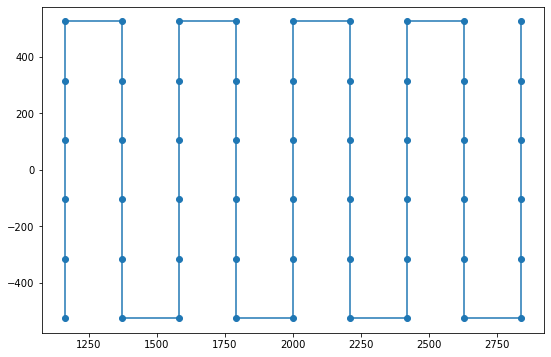

In [7]:
plt.figure(figsize=(dim_x, dim_y))
plt.plot(sorted_positions[:,0],sorted_positions[:,1],'o-')
plt.show()

In [8]:
# write into a file
data_folder = r'D:\Pu\20210801-MEF_CTP10_Aire_DNA'
fl = os.path.join(data_folder, 'positions_all.txt')

f = open(fl,'w')
for position in sorted_positions:
    f.write(str(position[0])+", "+str(position[1])+"\n")
f.close()

In [11]:
for position in sorted_positions:
    print(str(position[0])+", "+str(position[1]))

-485.0, -735.0
-485.0, -525.0
-485.0, -315.0
-485.0, -105.0
-485.0, 105.0
-485.0, 315.0
-485.0, 525.0
-485.0, 735.0
-275.0, 735.0
-275.0, 525.0
-275.0, 315.0
-275.0, 105.0
-275.0, -105.0
-275.0, -315.0
-275.0, -525.0
-275.0, -735.0
-65.0, -735.0
-65.0, -525.0
-65.0, -315.0
-65.0, -105.0
-65.0, 105.0
-65.0, 315.0
-65.0, 525.0
-65.0, 735.0
145.0, 735.0
145.0, 525.0
145.0, 315.0
145.0, 105.0
145.0, -105.0
145.0, -315.0
145.0, -525.0
145.0, -735.0
355.0, -735.0
355.0, -525.0
355.0, -315.0
355.0, -105.0
355.0, 105.0
355.0, 315.0
355.0, 525.0
355.0, 735.0
565.0, 735.0
565.0, 525.0
565.0, 315.0
565.0, 105.0
565.0, -105.0
565.0, -315.0
565.0, -525.0
565.0, -735.0
775.0, -735.0
775.0, -525.0
775.0, -315.0
775.0, -105.0
775.0, 105.0
775.0, 315.0
775.0, 525.0
775.0, 735.0
985.0, 735.0
985.0, 525.0
985.0, 315.0
985.0, 105.0
985.0, -105.0
985.0, -315.0
985.0, -525.0
985.0, -735.0


In [8]:
pos_files = [os.path.join(data_folder, _fl) for _fl in os.listdir(data_folder) if _fl.split(os.extsep)[-1]=='txt']
print(pos_files)

['D:\\Pu\\lumencor_test_MEF\\positions.txt']


In [35]:
import pandas

all_positions = []
for _fl in pos_files:
    _data_frame = pandas.read_csv(_fl,header=None, names=['X','Y'])
    for _x, _y in zip(_data_frame['X'], _data_frame['Y']):
        all_positions.append([_x,_y])
all_positions = np.round(np.array(all_positions), 2)
print(all_positions)

[[-3749.3 -1790.1]
 [-3749.3 -1580.1]
 [-3749.3 -1370.1]
 [-3749.3 -1160.1]
 [-3749.3  -950.1]
 [-3749.3  -740.1]
 [-3749.3  -530.1]
 [-3749.3  -320.1]
 [-3749.3  -110.1]
 [-3539.3  -110.1]
 [-3539.3  -320.1]
 [-3539.3  -530.1]
 [-3539.3  -740.1]
 [-3539.3  -950.1]
 [-3539.3 -1160.1]
 [-3539.3 -1370.1]
 [-3539.3 -1580.1]
 [-3539.3 -1790.1]
 [-3329.3 -1790.1]
 [-3329.3 -1580.1]
 [-3329.3 -1370.1]
 [-3329.3 -1160.1]
 [-3329.3  -950.1]
 [-3329.3  -740.1]
 [-3329.3  -530.1]
 [-3329.3  -320.1]
 [-3329.3  -110.1]
 [-3119.3  -110.1]
 [-3119.3  -320.1]
 [-3119.3  -530.1]
 [-3119.3  -740.1]
 [-3119.3  -950.1]
 [-3119.3 -1160.1]
 [-3119.3 -1370.1]
 [-3119.3 -1580.1]
 [-3119.3 -1790.1]
 [-1971.  -1937. ]
 [-1971.  -1727. ]
 [-1971.  -1517. ]
 [-1971.  -1307. ]
 [-1971.  -1097. ]
 [-1971.   -887. ]
 [-1971.   -677. ]
 [-1971.   -467. ]
 [-1761.   -467. ]
 [-1761.   -677. ]
 [-1761.   -887. ]
 [-1761.  -1097. ]
 [-1761.  -1307. ]
 [-1761.  -1517. ]
 [-1761.  -1727. ]
 [-1761.  -1937. ]
 [ -999.9 -1

In [42]:
data_folder = r'D:\Shiwei\20210529-P_Forebrain_MERFISH_CTP09_exp2'

all_positions = np.loadtxt(os.path.join(data_folder, 'adjusted_translated_positions_all.txt'), delimiter=',')

In [43]:
all_positions

array([[-3746.7, -1786.2],
       [-3746.7, -1576.2],
       [-3746.7, -1366.2],
       [-3746.7, -1156.2],
       [-3746.7,  -946.2],
       [-3746.7,  -736.2],
       [-3746.7,  -526.2],
       [-3746.7,  -316.2],
       [-3746.7,  -106.2],
       [-3536.7,  -106.2],
       [-3536.7,  -316.2],
       [-3536.7,  -526.2],
       [-3536.7,  -736.2],
       [-3536.7,  -946.2],
       [-3536.7, -1156.2],
       [-3536.7, -1366.2],
       [-3536.7, -1576.2],
       [-3536.7, -1786.2],
       [-3326.7, -1786.2],
       [-3326.7, -1576.2],
       [-3326.7, -1366.2],
       [-3326.7, -1156.2],
       [-3326.7,  -946.2],
       [-3326.7,  -736.2],
       [-3326.7,  -526.2],
       [-3326.7,  -316.2],
       [-3326.7,  -106.2],
       [-3116.7,  -106.2],
       [-3116.7,  -316.2],
       [-3116.7,  -526.2],
       [-3116.7,  -736.2],
       [-3116.7,  -946.2],
       [-3116.7, -1156.2],
       [-3116.7, -1366.2],
       [-3116.7, -1576.2],
       [-3116.7, -1786.2],
       [-1968.4, -1933.1],
 

In [44]:
# write into a file

all_pos_filename = os.path.join(data_folder, 'adjusted_positions_all.txt')

with open(all_pos_filename, 'w') as _fp:
    for position in all_positions:
        #_fp.write(str(round(position[0],2))+","+str(position[1])+os.linesep) # python2 works
        _fp.write(str(round(position[0],2))+","+str(position[1])+"\n")

In [38]:
x= " 999"

In [39]:
float (x)

999.0

In [21]:
## test position file loading
filename = r'Z:\20210801-MEF_CTP10_Aire_DNA\Mosiacs\60x_405_mosiac.msc'
line = 'test\n'
with open(filename, 'r') as fp:
    lines = fp.readlines()
    #while len(line) > 0:
    #    line = fp.readline().rstrip()
    #    print(line, len(line))

In [22]:
lines

['image,60x_405_mosiac_1.stv\n',
 '\n',
 'image,60x_405_mosiac_2.stv\n',
 '\n',
 'image,60x_405_mosiac_3.stv\n',
 '\n',
 'image,60x_405_mosiac_4.stv\n',
 '\n',
 'image,60x_405_mosiac_5.stv\n',
 '\n',
 'image,60x_405_mosiac_6.stv\n',
 '\n',
 'image,60x_405_mosiac_7.stv\n',
 '\n',
 'image,60x_405_mosiac_8.stv\n',
 '\n',
 'image,60x_405_mosiac_9.stv\n',
 '\n',
 'image,60x_405_mosiac_10.stv\n',
 '\n',
 'image,60x_405_mosiac_11.stv\n',
 '\n',
 'image,60x_405_mosiac_12.stv\n',
 '\n',
 'image,60x_405_mosiac_13.stv\n',
 '\n',
 'image,60x_405_mosiac_14.stv\n',
 '\n',
 'image,60x_405_mosiac_15.stv\n',
 '\n',
 'image,60x_405_mosiac_16.stv\n',
 '\n',
 'image,60x_405_mosiac_17.stv\n',
 '\n',
 'image,60x_405_mosiac_18.stv\n',
 '\n',
 'image,60x_405_mosiac_19.stv\n',
 '\n',
 'image,60x_405_mosiac_20.stv\n',
 '\n',
 'image,60x_405_mosiac_21.stv\n',
 '\n',
 'image,60x_405_mosiac_22.stv\n',
 '\n',
 'image,60x_405_mosiac_23.stv\n',
 '\n',
 'image,60x_405_mosiac_24.stv\n',
 '\n',
 'image,60x_405_mosiac_25

In [23]:
line.rstrip()

'test'